In [1]:
import pandas as pd
import numpy as np
import pylab as plt

## LeNet CNN

In [2]:
results = pd.read_csv('./lenet_mnist/result/results.csv')

In [3]:
results.head()

,infrastructure,model,script,batch_size,gpus,accuracy,epochs,time,samples_sec
0,0,lenet,keras_mxnet_lenet,64,0,0.991634,12,255.700000,235.000000
1,0,lenet,keras_mxnet_lenet,128,0,0.988675,12,263.200000,228.000000
2,0,lenet,keras_mxnet_lenet,256,0,0.987552,12,232.400000,258.000000
3,0,lenet,keras_mxnet_lenet,512,0,0.986328,12,212.400000,283.000000
4,2,lenet,keras_mxnet_lenet,64,1,0.989200,12,5.570224,10771.560237


In [30]:
def printResult(title, dataframe, range_acc):
    cpu = dataframe.loc[dataframe.gpus == 0]
    gpu = dataframe.loc[dataframe.gpus == 1]
    multigpu4 = dataframe.loc[dataframe.gpus == 4]
    multigpu8 = dataframe.loc[dataframe.gpus == 8]

    best_cpu = cpu.loc[(cpu.accuracy >= range_acc[0]) & (cpu.accuracy <= range_acc[1])]
    best_gpu = gpu.loc[(gpu.accuracy >= range_acc[0]) & (gpu.accuracy <= range_acc[1])]
    best_multigpu4 = multigpu4.loc[(multigpu4.accuracy >= range_acc[0]) & (multigpu4.accuracy <= range_acc[1])]
    best_multigpu8 = multigpu8.loc[(multigpu8.accuracy >= range_acc[0]) & (multigpu8.accuracy <= range_acc[1])]

    x_values = [1,2,3,4]
    y_values = [best_cpu.samples_sec.max(),
            best_gpu.samples_sec.max(),
            best_multigpu4.samples_sec.max(),
            best_multigpu8.samples_sec.max()]

    labels = list(['CPU', 'GPU', '4 GPU', '8 GPU'])
    plt.plot(x_values, [y_values[0], y_values[1], None, None], 'm')
    plt.plot(x_values, [None, y_values[1], y_values[2], None], 'r')
    plt.plot(x_values, [None, None, y_values[2],  y_values[3]], 'k')
    plt.plot(x_values, [None, y_values[1], y_values[1] * 4, y_values[1] * 8], 'b')
    plt.xticks(x_values, labels, rotation='vertical')
    plt.xlabel('Hardware')
    plt.ylabel('samples/seg')
    plt.title('Performance evolution: ' + title)
    plt.show()
    

def compareResult(title, dataframe1, dataframe2, range_acc):
    cpu1 = dataframe1.loc[dataframe1.gpus == 0]
    gpu1 = dataframe1.loc[dataframe1.gpus == 1]
    multigpu14 = dataframe1.loc[dataframe1.gpus == 4]
    multigpu18 = dataframe1.loc[dataframe1.gpus == 8]
    
    cpu2 = dataframe2.loc[dataframe2.gpus == 0]
    gpu2 = dataframe2.loc[dataframe2.gpus == 1]
    multigpu24 = dataframe2.loc[dataframe2.gpus == 4]
    multigpu28 = dataframe2.loc[dataframe2.gpus == 8]

    best_cpu1 = cpu1.loc[(cpu1.accuracy >= range_acc[0]) & (cpu1.accuracy <= range_acc[1])]
    best_gpu1 = gpu1.loc[(gpu1.accuracy >= range_acc[0]) & (gpu1.accuracy <= range_acc[1])]
    best_multigpu14 = multigpu14.loc[(multigpu14.accuracy >= range_acc[0]) & (multigpu14.accuracy <= range_acc[1])]
    best_multigpu18 = multigpu18.loc[(multigpu18.accuracy >= range_acc[0]) & (multigpu18.accuracy <= range_acc[1])]
    
    best_cpu2 = cpu2.loc[(cpu2.accuracy >= range_acc[0]) & (cpu2.accuracy <= range_acc[1])]
    best_gpu2 = gpu2.loc[(gpu2.accuracy >= range_acc[0]) & (gpu2.accuracy <= range_acc[1])]
    best_multigpu24 = multigpu24.loc[(multigpu24.accuracy >= range_acc[0]) & (multigpu24.accuracy <= range_acc[1])]
    best_multigpu28 = multigpu28.loc[(multigpu28.accuracy >= range_acc[0]) & (multigpu28.accuracy <= range_acc[1])]

    x_values = [1,2,3,4]
    y_values1 = [best_cpu1.samples_sec.max(),
            best_gpu1.samples_sec.max(),
            best_multigpu14.samples_sec.max(),
            best_multigpu18.samples_sec.max()]
    y_values2 = [best_cpu2.samples_sec.max(),
            best_gpu2.samples_sec.max(),
            best_multigpu24.samples_sec.max(),
            best_multigpu28.samples_sec.max()]

    labels = list(['CPU', 'GPU', '4 GPU', '8 GPU'])
    plt.plot(x_values, [y_values1[0], y_values1[1], None, None], 'm')
    plt.plot(x_values, [None, y_values1[1], y_values1[2], None], 'r')
    plt.plot(x_values, [None, None, y_values1[2],  y_values1[3]], 'k')
    plt.plot(x_values, y_values2, 'b')
    plt.xticks(x_values, labels, rotation='vertical')
    plt.xlabel('Hardware')
    plt.ylabel('samples/seg')
    plt.title('Performance evolution: ' + title)
    plt.show()    


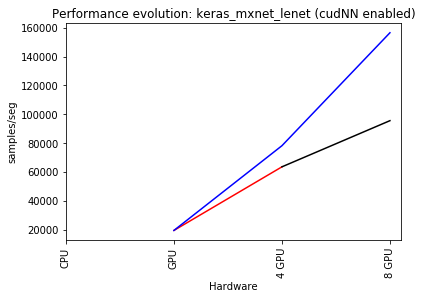

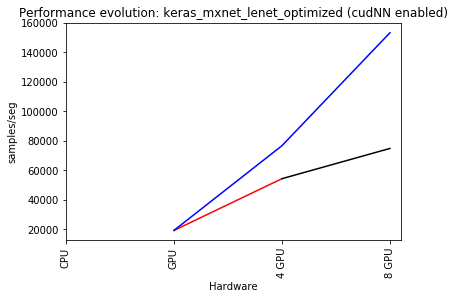

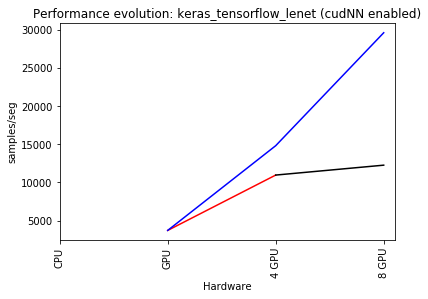

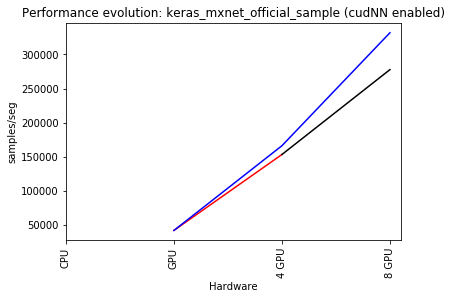

In [27]:
printResult("keras_mxnet_lenet (cudNN enabled)", results.loc[(results.script == 'keras_mxnet_lenet') & (results.infrastructure >= 0) & (results.infrastructure >= 2)], [0.950,1])
printResult("keras_mxnet_lenet_optimized (cudNN enabled)", results.loc[(results.script == 'keras_mxnet_lenet_optimized') & (results.infrastructure >= 0) & (results.infrastructure >= 2)], [0.950,1])
printResult("keras_tensorflow_lenet (cudNN enabled)", results.loc[(results.script == 'keras_tensorflow_lenet') & (results.infrastructure >= 0) & (results.infrastructure >= 2)], [0.950,1])
printResult("keras_mxnet_official_sample (cudNN enabled)", results.loc[(results.script == 'keras_mxnet_official_sample') & (results.infrastructure >= 0) & (results.infrastructure >= 2)], [0.950,1])

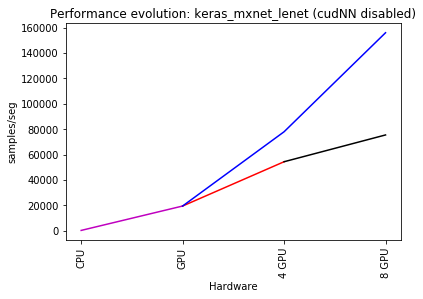

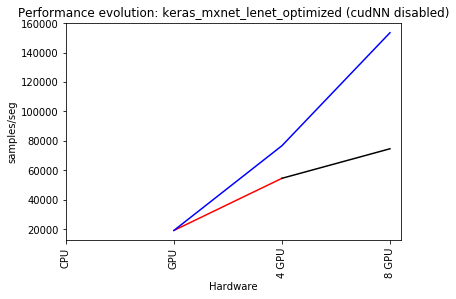

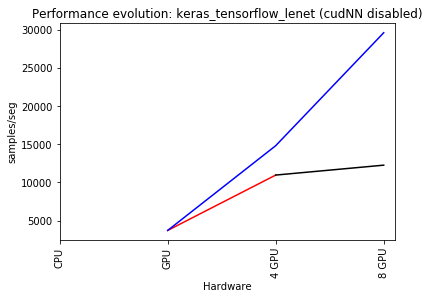

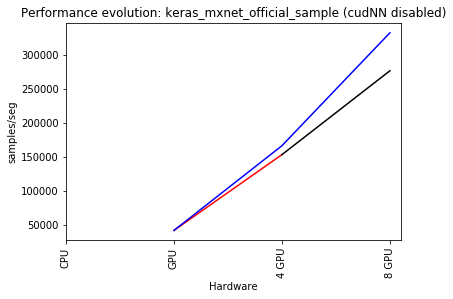

In [29]:
printResult("keras_mxnet_lenet (cudNN disabled)", results.loc[(results.script == 'keras_mxnet_lenet') & (results.infrastructure <= 1)], [0.950,1])
printResult("keras_mxnet_lenet_optimized (cudNN disabled)", results.loc[(results.script == 'keras_mxnet_lenet_optimized') & (results.infrastructure <= 1)], [0.950,1])
printResult("keras_tensorflow_lenet (cudNN disabled)", results.loc[(results.script == 'keras_tensorflow_lenet') & (results.infrastructure >= 0) & (results.infrastructure >= 2)], [0.950,1])
printResult("keras_mxnet_official_sample (cudNN disabled)", results.loc[(results.script == 'keras_mxnet_official_sample') & (results.infrastructure <= 1)], [0.950,1])

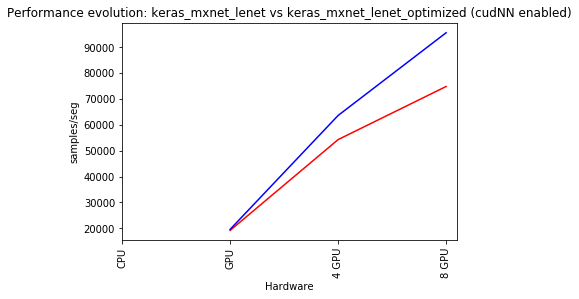

In [7]:
compareResult("keras_mxnet_lenet vs keras_mxnet_lenet_optimized (cudNN enabled)", results.loc[(results.script == 'keras_mxnet_lenet_optimized') & (results.infrastructure >= 2)], results.loc[(results.script == 'keras_mxnet_lenet') & (results.infrastructure >= 2)], [0.950,1])

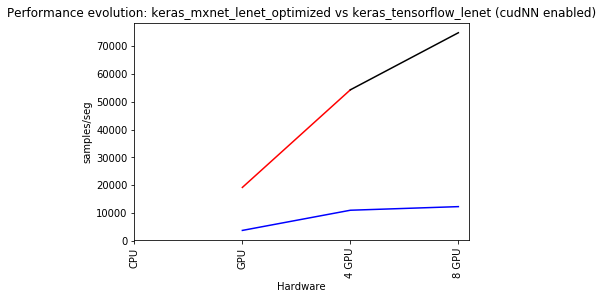

In [31]:
compareResult("keras_mxnet_lenet_optimized vs keras_tensorflow_lenet (cudNN enabled)", results.loc[(results.script == 'keras_mxnet_lenet_optimized') & (results.infrastructure >= 2)], results.loc[(results.script == 'keras_tensorflow_lenet') & (results.infrastructure >= 2)], [0.950,1])

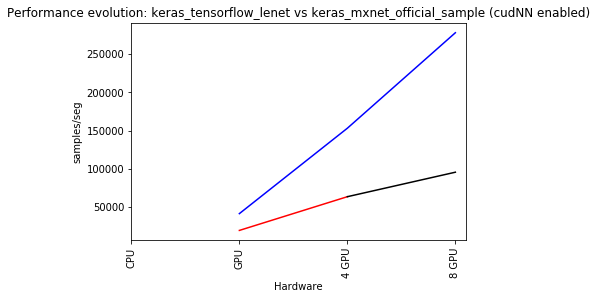

In [32]:
compareResult("keras_tensorflow_lenet vs keras_mxnet_official_sample (cudNN enabled)", results.loc[(results.script == 'keras_mxnet_lenet') & (results.infrastructure >= 2)], results.loc[(results.script == 'keras_mxnet_official_sample') & (results.infrastructure >= 2)], [0.950,1])

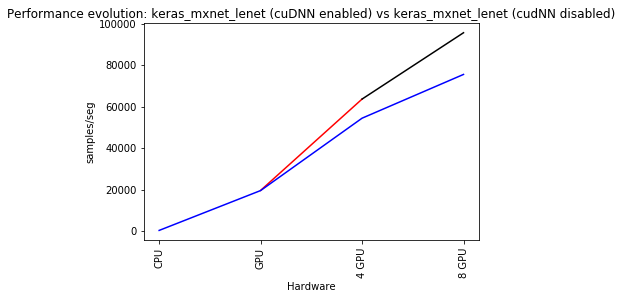

In [34]:
compareResult("keras_mxnet_lenet (cuDNN enabled) vs keras_mxnet_lenet (cudNN disabled)", results.loc[(results.script == 'keras_mxnet_lenet') & (results.infrastructure >= 2)], results.loc[(results.script == 'keras_mxnet_lenet') & (results.infrastructure <= 1)], [0.950,1])